In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import preprocessing

In [2]:
PBMC_SHSY5Y_PATH = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420.csv")

manual_cluster_1_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_1.csv"
)

manual_cluster_2_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_2.csv"
)

PBMC_SHSY5Y_df = pd.read_csv(PBMC_SHSY5Y_PATH)


manual_clusters_1 = pd.read_csv(manual_cluster_1_path)
manual_clusters_2 = pd.read_csv(manual_cluster_2_path)

In [3]:
# select data only columns and make floats
nELISA_data_values = PBMC_SHSY5Y_df.filter(like="NSU", axis=1)
nELISA_data_values = nELISA_data_values.astype("float")
nELISA_data_values.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.398325,-0.130139,8.797693,-0.445542,0.371358,-0.462473,1.422635,-1.915471,-0.748352,-1.583011,...,-1.065390,-0.314291,0.171604,-0.137741,0.373863,-1.042447,-1.016304,-0.289143,0.373108,-0.804121
1,-0.835343,-0.174790,7.975378,-0.747735,-2.742042,-0.735577,-2.106887,-0.153780,-0.750152,-0.241556,...,-0.766995,0.190291,-1.499028,-0.660653,-0.594824,-0.400520,-0.100588,-1.055132,-0.020319,-0.946662
2,-0.933929,-1.258131,7.642998,-0.720992,-4.155766,1.830996,1.389517,-0.785248,-0.262083,-1.058364,...,0.547156,-0.793964,0.592818,-1.207418,-0.318222,0.187477,-1.584273,-0.015301,-1.393639,-2.013903
3,-0.965939,0.443343,4.022308,-1.913187,1.560739,-1.219594,0.139052,0.110671,0.179028,-0.604800,...,-1.639177,0.494727,1.050084,-2.030229,0.663452,-0.645759,1.403077,-1.946008,-1.806517,-0.911292
4,-0.961577,-0.006246,11.143199,-0.869969,-0.589156,0.173679,1.374521,-1.267405,0.044353,-0.098963,...,-0.899452,-0.197758,-0.858524,0.211425,-0.734540,-0.938241,-0.976583,0.352800,0.472133,-1.347747


In [4]:
# normalize data via max value in each column
max_values = nELISA_data_values.max()  # find max value in each column
nELISA_data_values_sensor_max_norm = nELISA_data_values.div(
    max_values
)  # divide each value in each column by max value in that column
nELISA_data_values_sensor_max_norm.head()
# min max normalization via sklearn


# normalize data via min max normalization
min_max_scaler = preprocessing.MinMaxScaler()
nELISA_data_values_min_max_norm = min_max_scaler.fit_transform(nELISA_data_values)
nELISA_data_values_min_max_norm = pd.DataFrame(
    nELISA_data_values_min_max_norm, columns=nELISA_data_values.columns
)
nELISA_data_values_min_max_norm.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.097710,0.462858,0.319097,0.514695,0.479281,0.308273,0.708849,0.250333,0.350986,0.216932,...,0.343101,0.176256,0.438480,0.560129,0.059447,0.356508,0.318541,0.238358,0.577981,0.251567
1,0.064513,0.452377,0.296507,0.471026,0.269795,0.245694,0.247611,0.412860,0.350642,0.349237,...,0.403887,0.213869,0.101348,0.476656,0.037166,0.428529,0.431022,0.168645,0.516608,0.229675
2,0.061860,0.198070,0.287376,0.474891,0.174672,0.833798,0.704521,0.354603,0.443939,0.268677,...,0.671590,0.140500,0.523480,0.389375,0.043528,0.494499,0.248775,0.263281,0.302374,0.065763
3,0.060998,0.597480,0.187913,0.302610,0.559309,0.134787,0.541110,0.437258,0.528260,0.313411,...,0.226216,0.236562,0.615756,0.258029,0.066107,0.401014,0.615722,0.087565,0.237967,0.235107
4,0.061116,0.491942,0.383529,0.453362,0.414653,0.454041,0.702561,0.310121,0.502516,0.363301,...,0.376904,0.184943,0.230601,0.615867,0.033952,0.368200,0.323420,0.296782,0.593429,0.168074


In [5]:
# drop columns that are named with NSU
Metadata = PBMC_SHSY5Y_df.drop(PBMC_SHSY5Y_df.filter(like="NSU", axis=1), axis=1)
Metadata = Metadata.drop(PBMC_SHSY5Y_df.filter(like="pgML", axis=1), axis=1)
Metadata.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,...,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id
0,70117_20230210MM1_P1,430420,B06,PBMC,6 h,DMSO,0.025,%,0.03%,DMSO,...,NaN,NaN,430420_B06,430420,30,B06,2,NaN,1,30
1,70117_20230210MM1_P1,430420,C06,PBMC,6 h,DMSO,0.025,%,0.03%,DMSO,...,NaN,NaN,430420_C06,430420,54,C06,2,NaN,1,54
2,70117_20230210MM1_P1,430420,I06,PBMC,6 h,DMSO,0.025,%,0.03%,DMSO,...,NaN,NaN,430420_I06,430420,198,I06,2,NaN,1,198
3,70117_20230210MM1_P1,430420,J06,PBMC,6 h,DMSO,0.025,%,0.03%,DMSO,...,NaN,NaN,430420_J06,430420,222,J06,2,NaN,1,222
4,70117_20230210MM1_P1,430420,B07,PBMC,6 h,DMSO,0.025,%,0.03%,DMSO,...,NaN,NaN,430420_B07,430420,31,B07,2,NaN,1,31


In [6]:
analysis_df = pd.concat([Metadata, nELISA_data_values_min_max_norm], axis=1)

In [7]:
# add manual clusters columns to dataframe
nELISA_plate_430420 = pd.merge(
    analysis_df,
    manual_clusters_2,
    on=(
        "inducer1",
        "inducer1_concentration_value",
        "inhibitor",
        "inhibitor_concentration_value",
        "inducer2",
        "inducer2_concentration_value",
    ),
    how="inner",
)

In [8]:
# nELISA_plate_430420['treatment'] =
# dose column merge
conditions = [
    (nELISA_plate_430420["inducer2"].isnull()),
    nELISA_plate_430420["inducer2"].notnull(),
]

results = [
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inducer2"]
        + "_"
        + nELISA_plate_430420["inducer2_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
]
nELISA_plate_430420["Treatment_and_Dose"] = np.select(conditions, results)


results = [
    (nELISA_plate_430420["inducer1"]).astype(str),
    (nELISA_plate_430420["inducer1"] + "_" + nELISA_plate_430420["inducer2"]).astype(
        str
    ),
]
nELISA_plate_430420["Treatments"] = np.select(conditions, results)

In [9]:
# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["Treatments"].isin(
        [
            "Thapsigargin",
            "LPS",
            "DMSO",
        ]
    )
]

# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["inhibitor"].isin(["DMSO"])
]

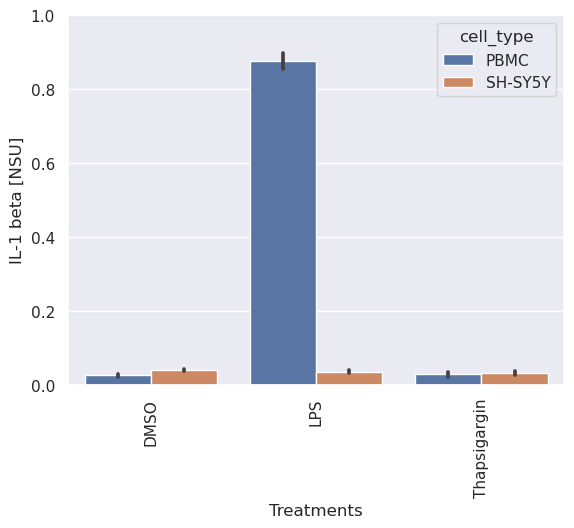

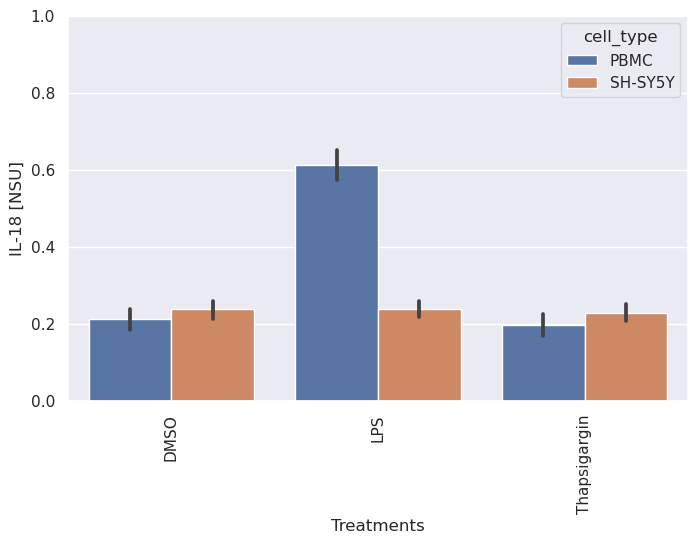

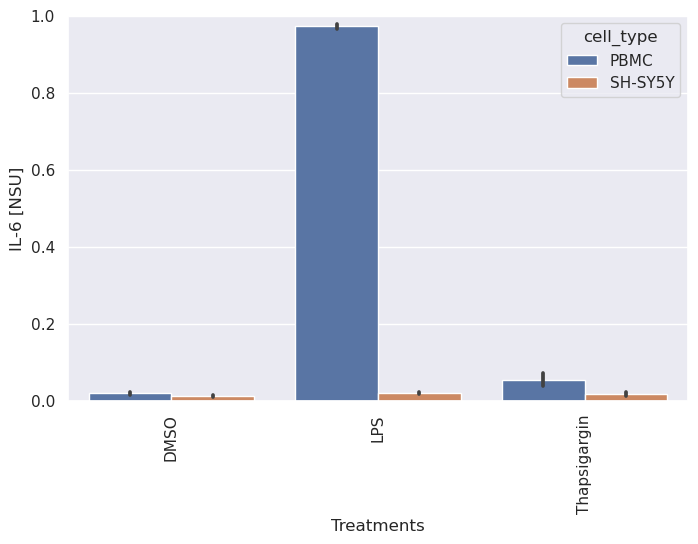

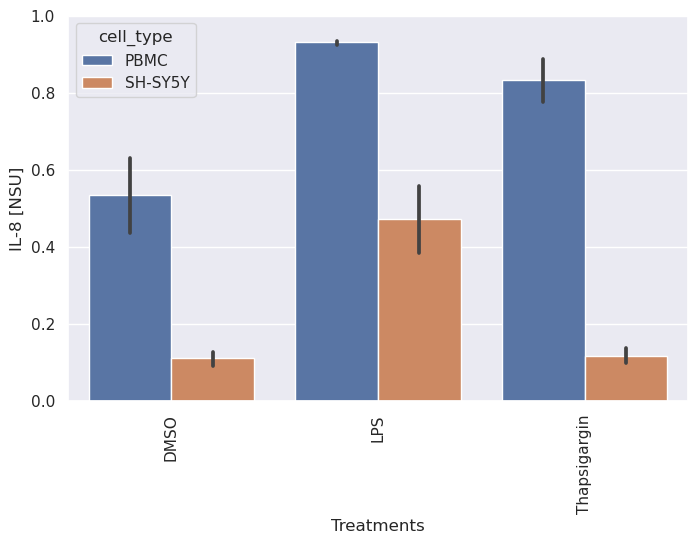

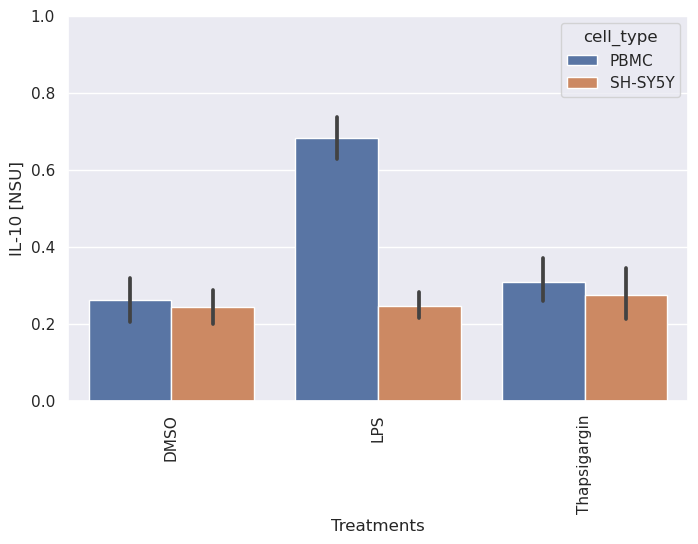

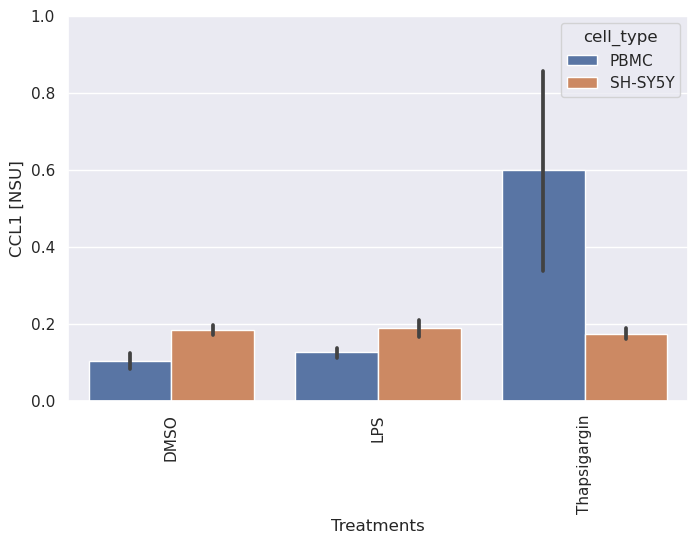

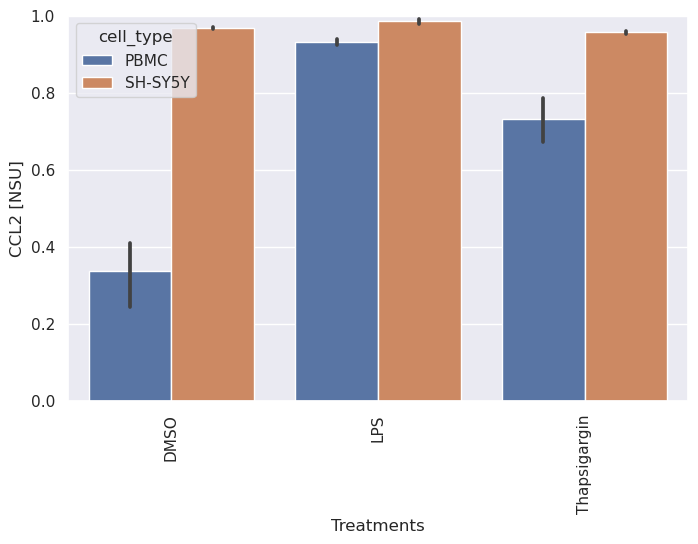

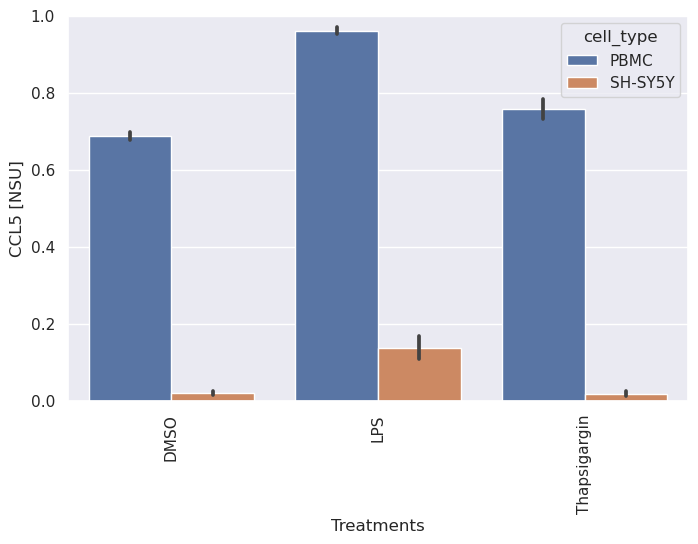

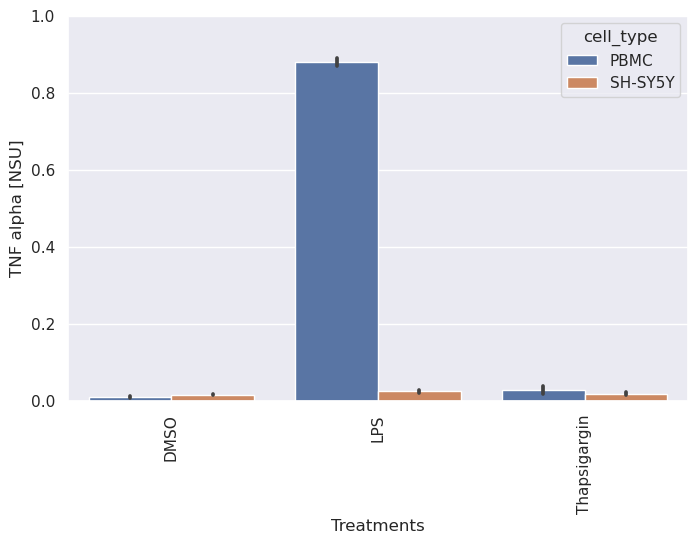

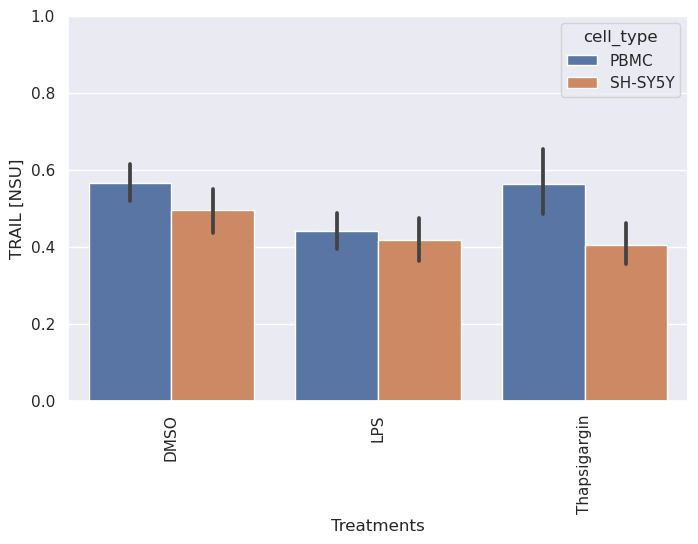

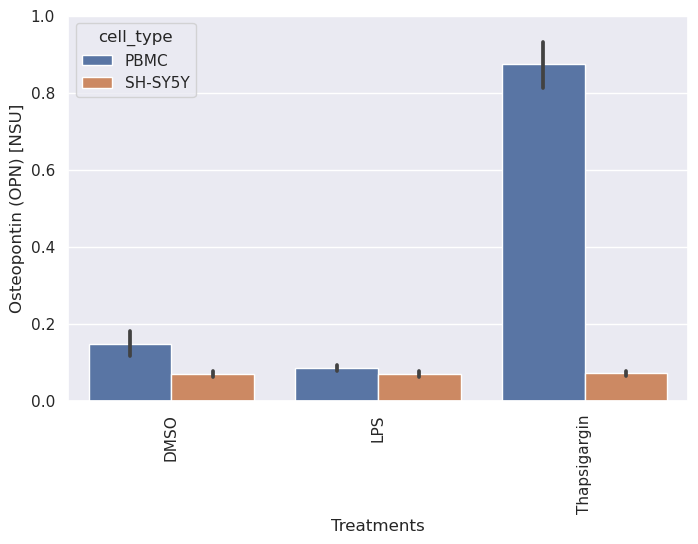

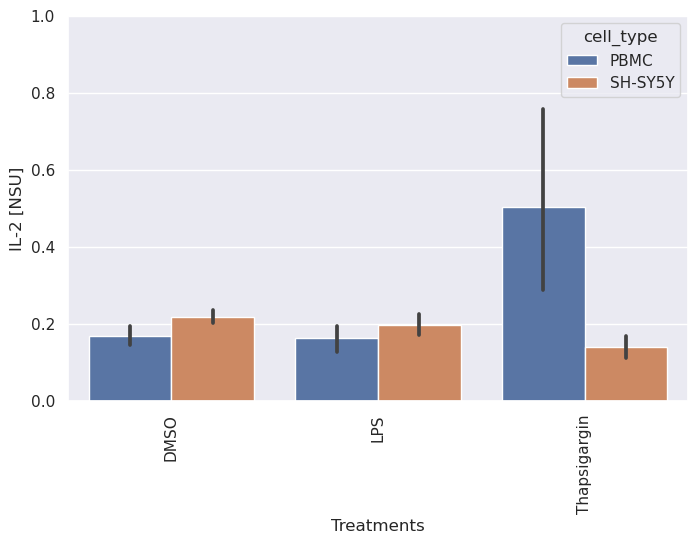

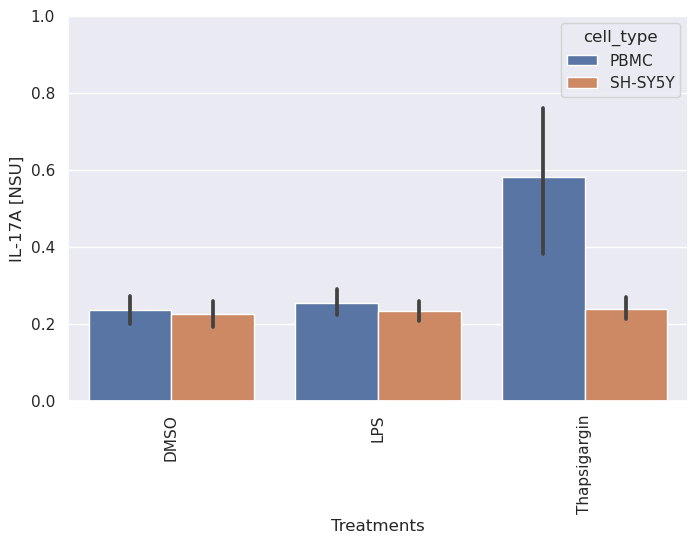

In [10]:
def plot_cytokines(df, cytokine):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    # plot a bar chart
    sns.barplot(
        y=cytokine,
        x="Treatments",
        hue="cell_type",
        data=df,
        estimator=np.mean,
        errorbar=("ci", 95),
        # ci = 50,
        # color="#69b3a2",
    )
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.ylabel(cytokine)
    plt.savefig(f"figures/{cytokine}.png", bbox_inches="tight")
    plt.show()
    plt.close()


# plot all cytokines
plot_cytokines(nELISA_plate_430420, "IL-1 beta [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-18 [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-6 [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-8 [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-10 [NSU]")
plot_cytokines(nELISA_plate_430420, "CCL1 [NSU]")
plot_cytokines(nELISA_plate_430420, "CCL2 [NSU]")
plot_cytokines(nELISA_plate_430420, "CCL5 [NSU]")
plot_cytokines(nELISA_plate_430420, "TNF alpha [NSU]")
plot_cytokines(nELISA_plate_430420, "TRAIL [NSU]")
plot_cytokines(nELISA_plate_430420, "Osteopontin (OPN) [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-2 [NSU]")
plot_cytokines(nELISA_plate_430420, "IL-17A [NSU]")

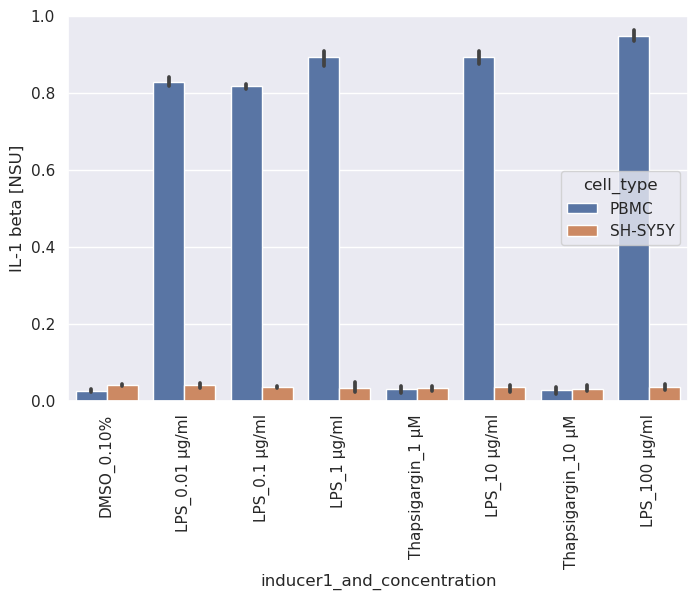

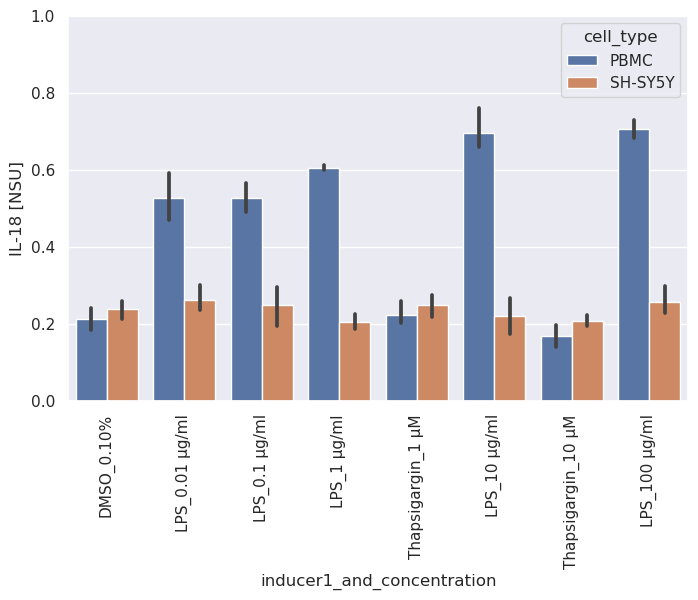

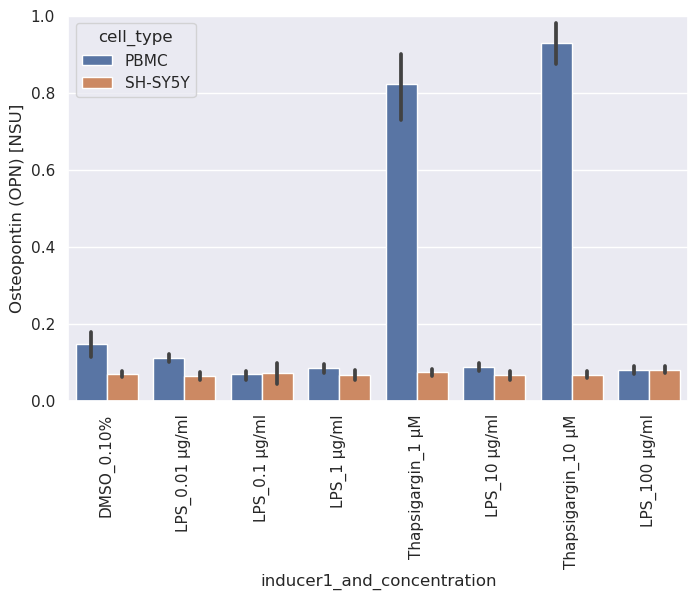

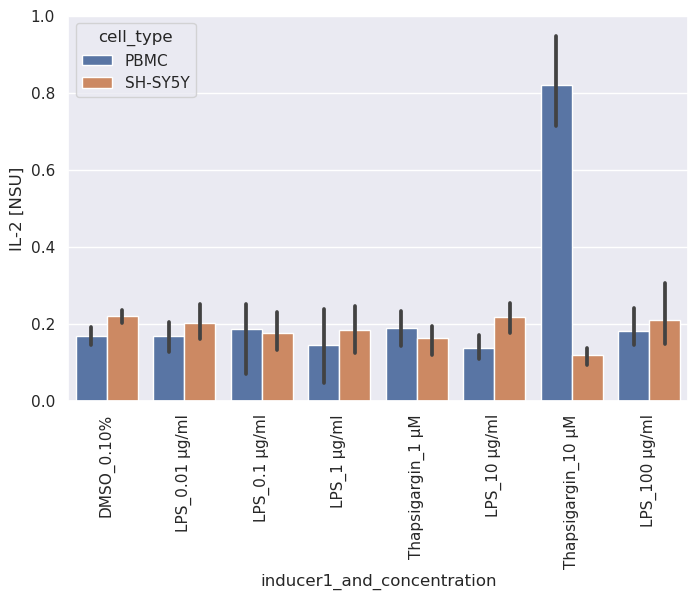

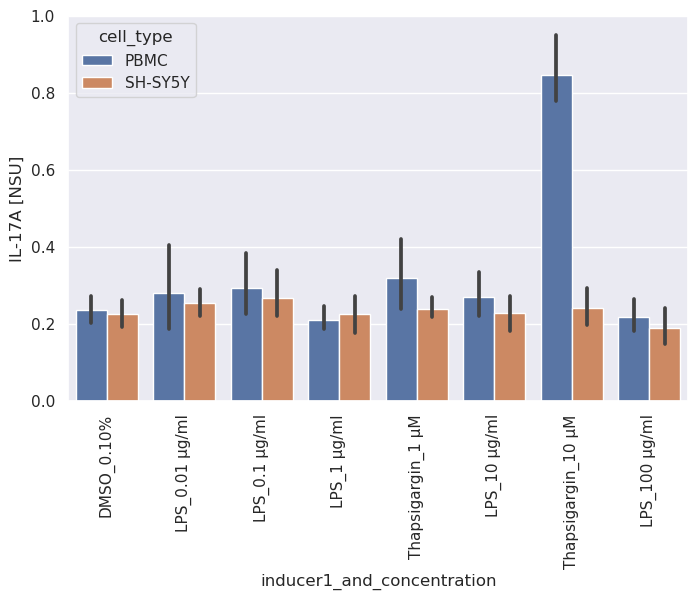

In [11]:
def plot_cytokines_treatments(df, cytokine):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    # plot a bar chart
    sns.barplot(
        y=cytokine,
        x="inducer1_and_concentration",
        hue="cell_type",
        data=df,
        estimator=np.mean,
        errorbar=("ci", 95),
        # ci = 50,
        # color="#69b3a2",
    )
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.ylabel(cytokine)
    plt.savefig(f"figures/{cytokine}_all_dosages.png", bbox_inches="tight")
    plt.show()
    plt.close()


nELISA_plate_430420["inducer1_and_concentration"] = (
    nELISA_plate_430420["inducer1"]
    + "_"
    + nELISA_plate_430420["inducer1_concentration"].astype(str)
)
plot_cytokines_treatments(nELISA_plate_430420, "IL-1 beta [NSU]")
plot_cytokines_treatments(nELISA_plate_430420, "IL-18 [NSU]")
plot_cytokines_treatments(nELISA_plate_430420, "Osteopontin (OPN) [NSU]")
plot_cytokines_treatments(nELISA_plate_430420, "IL-2 [NSU]")
plot_cytokines_treatments(nELISA_plate_430420, "IL-17A [NSU]")

In [12]:
# open pdf file
with PdfPages("figures/inducers.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="inducer1",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            # standard deviation errorbars
            errorbar=("sd"),
        )
        plt.xticks(rotation=45)
        pdf.savefig(bbox_inches="tight")
        plt.close()

In [13]:
# open pdf file
with PdfPages("figures/death_type.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="Function",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            errorbar=("sd"),
        )
        plt.xticks(rotation=90)
        pdf.savefig(bbox_inches="tight")
        plt.close()

In [14]:
# open pdf file
with PdfPages("figures/all_treatmemts.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="Treatment_and_Dose",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            errorbar=("sd"),
        )
        plt.xticks(rotation=90)
        pdf.savefig(bbox_inches="tight")
        plt.close()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'DMSO_0.10%_DMSO_0.03%'),
  Text(1, 0, 'DMSO_0.10%_DMSO_1%'),
  Text(2, 0, 'LPS_0.01 µg/ml_DMSO_0.03%'),
  Text(3, 0, 'LPS_0.1 µg/ml_DMSO_0.03%'),
  Text(4, 0, 'LPS_1 µg/ml_DMSO_0.03%'),
  Text(5, 0, 'Thapsigargin_1 µM_DMSO_0.03%'),
  Text(6, 0, 'LPS_10 µg/ml_DMSO_0.03%'),
  Text(7, 0, 'Thapsigargin_10 µM_DMSO_0.03%'),
  Text(8, 0, 'LPS_100 µg/ml_DMSO_0.03%')])

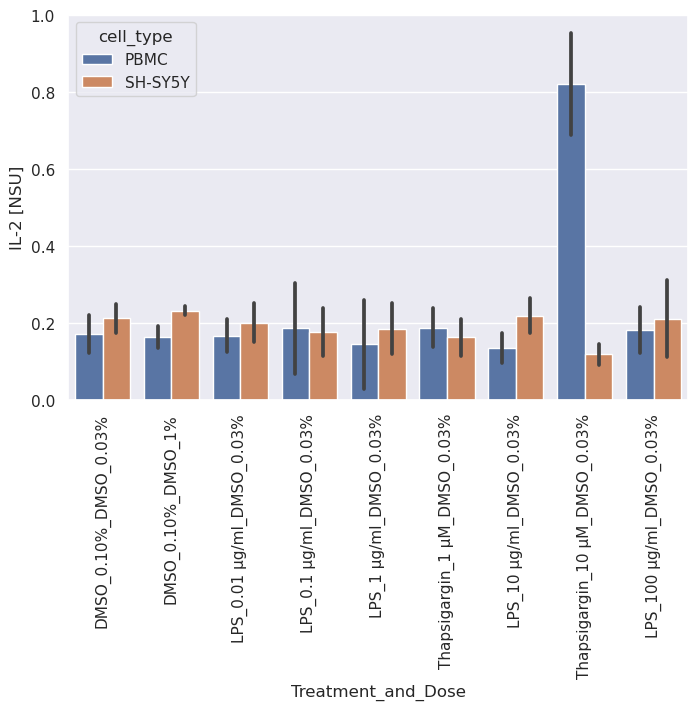

In [15]:
plt.figure()
plt.tight_layout()
# sns.set(rc={"figure.figsize": (8, 5)})
# plot a bar chart
sns.barplot(
    y=nELISA_plate_430420["IL-2 [NSU]"],
    x="Treatment_and_Dose",
    data=nELISA_plate_430420,
    hue="cell_type",
    estimator=np.mean,
    errorbar=("sd"),
)
plt.xticks(rotation=90)